# Data Formats in Medical Imaging - Analysis + Manipulation in Python
* Notebook by Adam Lang
* Date: 5/2/2024
* I used this notebook to take notes and code along with the udemy course Deep Learning with PyTorch for medical image analysis. I also experimented with some of the code from the course on my own.



# DICOM - Digital Imaging and Communications in Medicine
* The international standard for medical images and related information.
* Defines the formats for medical images to be exchanged with the data and quality necessary for clinical use.
    * Source: https://www.dicomstandard.org/about

## What is DICOM used for?
* Storage and sharing of medical images with improved interoperability for data exchange between institutions.
* Communicating DICOM imaging data and metadata between medical devices -- also allowing interoperability.
* Majority of imaging data in hospitals and clinics are stored in the DICOM imaging format.

## DICOM Data Structure
* Header
    * Information on each device (e.g. modality, scanner, etc.)
    * PHI (patient information)
    * Imaging study UID and Series UID
    * Imaging info:
          * shape
          * slice
          * thickness
    * Each DICOM header entry is accessible via its unique **Data Tag**
    * Example given from course:
        * Tag -> property
        * Explanation -> human readable
        * Value ->
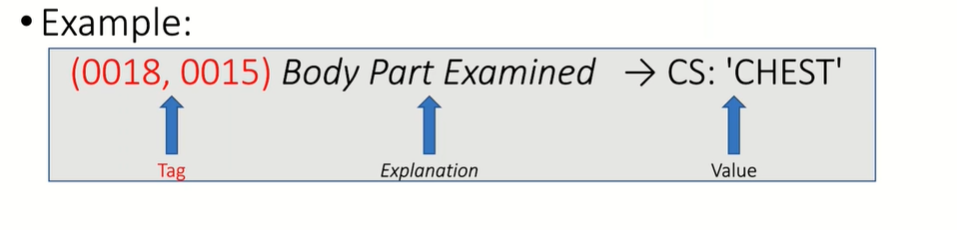


* Body
    * Actual image pixel data
        * 2D
        * 3D
        * 4D
        * etc....

## ....DICOM and its confusing data issues....
* Every hospital has Vendor-specific adaptations(e.g. "private tags" for each header
* 3D volumes are often stored as multiple 2D DICOM files.
    * This often requires manual or programming "re-assembly" to get the 3D image structures.
* DICOM file extension variables can include:
    * ".dcm"
    * ".ima"
    * ....and sometimes "none"
* This is why DICOM is usually used in a clinical setting and requires conversion to other data formats for research and machine learning tasks.

## Tools for DICOM files
* Python libraries:
    * PyDicom
    * SimpleITK
* Image viewer: 3D slicer
    * www.slicer.org
    * open-source!

## Anonymization of DICOM files
* Very important to protect PHI!!
* See: www.mircwiki.rsna.org

# DICOM File Analysis + Manipulation in Python


In [2]:
# install pydicom
!pip install pydicom

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 18.1 MB/s eta 0:00:00


In [3]:
## import libraries
from pathlib import Path
import pydicom
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
# set file path
image_path = '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/ID_0000_AGE_0060_CONTRAST_1_CT.dcm'

In [6]:
## upload a dicom file
dicom_file = pydicom.read_file(image_path)

In [7]:
# print file contents
print(dicom_file)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 194
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.108821836759549281694712274169
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.31'
-------------------------------------------------
(0008, 0000) Group Length                        UL: 430
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'AXIAL']
(0008, 0016) SOP Class UID                       UI: CT Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.14519.5.2.1.7777.9002.1088

### Data extraction example
* We will extract the "Rows" metadata.
* This corresponds to the entry:
    * (0028, 0010)
* To access this we need to:
    * 1. index
    * 2. convert to hexidecimals

In [8]:
# extract unique individual entry
# We need to:
## 1. index the metadata entry (0028, 0010)
## 2. hexadecimal conversion
dicom_file[0x0028, 0x0010]

(0028, 0010) Rows                                US: 512

We can also access the Rows metadata stored in the DICOM file object
  * Using "." dot notation to access the class object
  * Note about this method -> information loss occurs (see below)

In [9]:
## access Rows object in DICOM file
dicom_file.Rows

512

We can see above we were ONLY returned the number of rows.

### Image extraction from DICOM file
* using `pixel_array`

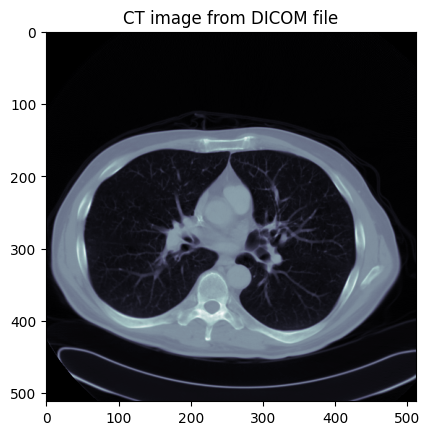

In [12]:
ct = dicom_file.pixel_array

# visualize with matplotlib
plt.figure()
## we have to pass the cmap parameter otherwise image defaults to colored
plt.imshow(ct, cmap="bone") # can also use "gray"
plt.title("CT image from DICOM file")
plt.show();

### MRI of head - image extraction

In [14]:
# establish image path
path_to_head_mri = Path("/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001")

In [16]:
## now access all head MRI images from path
## .glob will return generator -> conver to list
all_files = list(path_to_head_mri.glob("*"))

In [17]:
## return all_files
all_files

[PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000001'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000000'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000002'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000025'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000014'),
 PosixPath('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Me

In [18]:
## create and append to list
mri_data = []

for path in all_files:
  data = pydicom.read_file(path)
  mri_data.append(data)

In [20]:
## inspect slice location of mri data
for slice in mri_data[:5]:
  print(slice.SliceLocation)

5.99999663091323
0.0
11.9999973042441
149.999999502083
83.9999967682912


We need to sort and order the data now...

In [21]:
mri_data_ordered = sorted(mri_data, key=lambda slice: slice.SliceLocation)

for slice in mri_data_ordered[:5]:
  print(slice.SliceLocation)

0.0
5.99999663091323
11.9999973042441
17.9999979772582
23.9999946081714


In [22]:
# extract data from DICOM file --> store in list
full_volume = []
for slice in mri_data_ordered:
  full_volume.append(slice.pixel_array)

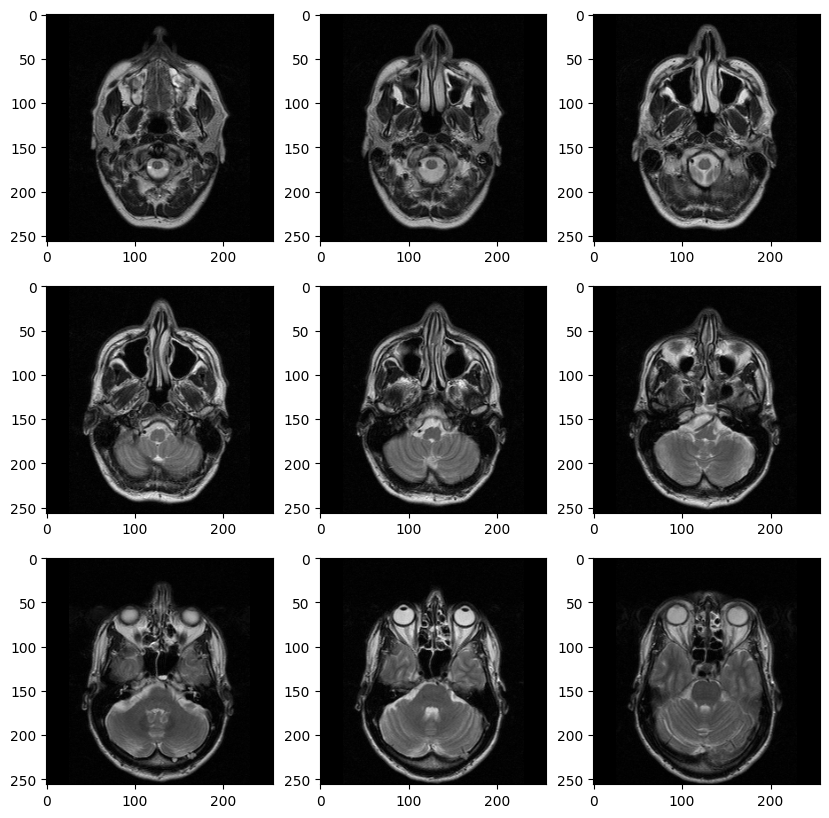

In [23]:
## look at plot of data
fig, axis = plt.subplots(3,3, figsize=(10,10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    axis[i][j].imshow(full_volume[slice_counter], cmap="gray")
    # increase slice counter by 1
    slice_counter+=1
plt.show();

# SimpleITK Implementation
* SimpleITK is a simplified programming interface to the algorithms and data structures of the Insight Toolkit (ITK). It supports interfaces for multiple programming languages including C++, Python, R, Java, C#, Lua, Ruby and TCL. These bindings enable scientists to develop image analysis workflows in the programming language they are most familiar with. The toolkit supports more than 15 different image file formats, provides over 280 image analysis filters, and implements a unified interface to the ITK intensity-based registration framework.
* Source: https://simpleitk.org/

In [24]:
!pip install SimpleITK

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.7/52.7 MB 19.8 MB/s eta 0:00:00


In [25]:
## import simpleITK
import SimpleITK as sitk

In [26]:
## SimpleITK is a C++ library -- can't handle path objects
## need to convert path to string
series_ids = sitk.ImageSeriesReader.GetGDCMSeriesIDs(str(path_to_head_mri))

# print them
print(series_ids)

('1.3.46.670589.11.0.0.11.4.2.0.12098.5.4500.2015011413262801702',)


In [27]:
## extract file names
series_file_names = sitk.ImageSeriesReader.GetGDCMSeriesFileNames(str(path_to_head_mri), series_ids[0])
series_file_names

('/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000000',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000001',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000002',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000003',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MATERIALS/03-Data-Formats/SE000001/MR000004',
 '/content/drive/MyDrive/Colab Notebooks/Deep Learning PyTorch Medical Image Analysis/AI-IN-MEDICAL-MATERIALS_NEW/AI-IN-MEDICAL-MA

In [28]:
## define series reader
series_reader = sitk.ImageSeriesReader()
series_reader.SetFileNames(series_file_names)

In [29]:
## create image_data var
image_data = series_reader.Execute()

In [30]:
## convert to numpy array
head_mri = sitk.GetArrayFromImage(image_data)

In [31]:
## examine shape
head_mri.shape

(27, 256, 256)

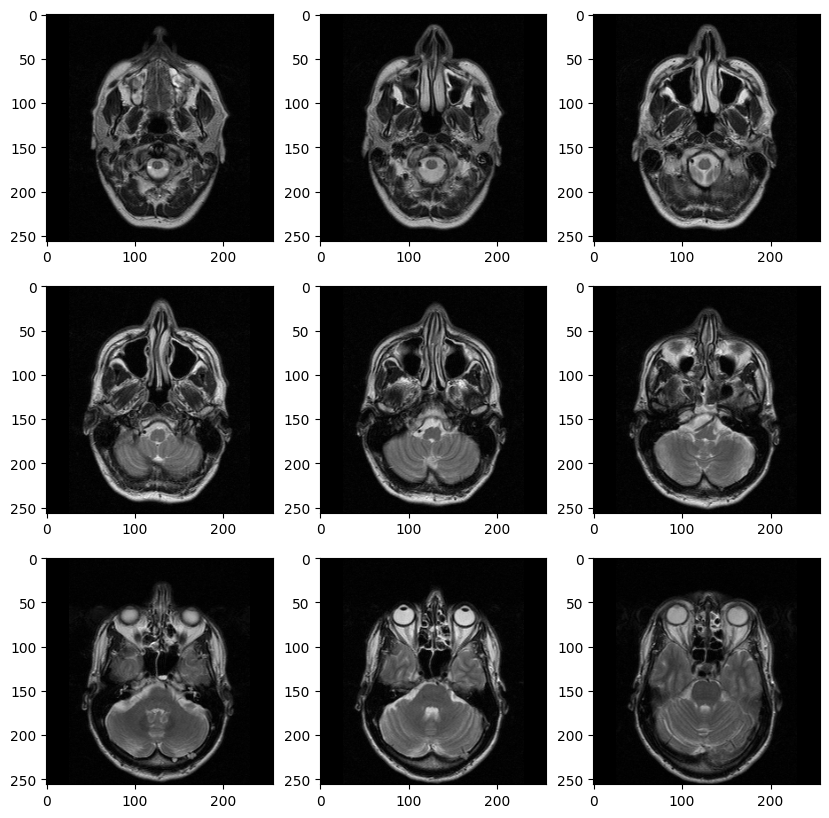

In [32]:
## final look at images
## use same loop as above with matplotlib
## look at plot of data
fig, axis = plt.subplots(3,3, figsize=(10,10))

slice_counter = 0
for i in range(3):
  for j in range(3):
    ## replace 'full_volume' with 'head_mri' var
    axis[i][j].imshow(head_mri[slice_counter], cmap="gray")
    # increase slice counter by 1
    slice_counter+=1
plt.show();

# References/Appendix

* From the original course notebook:

To fulfill this task we use a subset of CT images from the Cancer Imaging Archive TCIA (1, 2)
(https://www.kaggle.com/kmader/siim-medical-images) containing single CT slices.
We already provide a sample file in this folder

If you want to download the data, log in to kaggle, navigate to this page: https://www.kaggle.com/kmader/siim-medical-images?select=dicom_dir and click on download

(1) Albertina, B., Watson, M., Holback, C., Jarosz, R., Kirk, S., Lee, Y., … Lemmerman, J. (2016). Radiology Data from The Cancer Genome Atlas Lung Adenocarcinoma [TCGA-LUAD] collection. The Cancer Imaging Archive. http://doi.org/10.7937/K9/TCIA.2016.JGNIHEP5

(2) Clark K, Vendt B, Smith K, Freymann J, Kirby J, Koppel P, Moore S, Phillips S, Maffitt D, Pringle M, Tarbox L, Prior F. The Cancer Imaging Archive (TCIA): Maintaining and Operating a Public Information Repository, Journal of Digital Imaging, Volume 26, Number 6, December, 2013, pp 1045-1057. (paper)

(Data License: http://creativecommons.org/licenses/by/3.0/)